In [1]:
from qkids.DatabasePool import get_schedule_connection
from qkids.Models import Lesson
from qkids import Week
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
def get_finish_lessons_weekly(week):
    sql = "select r.id, schedule_id, room_type_id, course_id, lesson_id, begin_at, \
                student_count from schedules s join rooms r on s.id = r.schedule_id \
                and r.is_internal = 0     \
                and student_count> 0 and klass_id is null and status = 1  where begin_at in \
                %s and room_type_id in (2,5,7) " % week.slots_sqlstring
    df = pd.read_sql(sql, get_schedule_connection(), index_col='id')
    lesson = Lesson()
    df2 = df.groupby('lesson_id')['student_count'].sum()
    df3 = map(lesson.get_chapter_by_lesson, list(df2.index))
    df = pd.DataFrame(df2)
    df['chapter'] = list(df3)
    return df
def get_predict_schedule_file(week):
    df = pd.read_pickle('output/{}/farforschedule.pkl'.format(week))

In [47]:
def plot_contrast_week(week):
    df = get_finish_lessons_weekly(week)
    df2 = pd.read_pickle('/home/coffee/QkidsAutomation/output/{}/farforschedule.pkl'.format(week))
    predict = df2.groupby(level=2).sum()
    actual = df.groupby('chapter')['student_count'].sum()
    return predict, actual

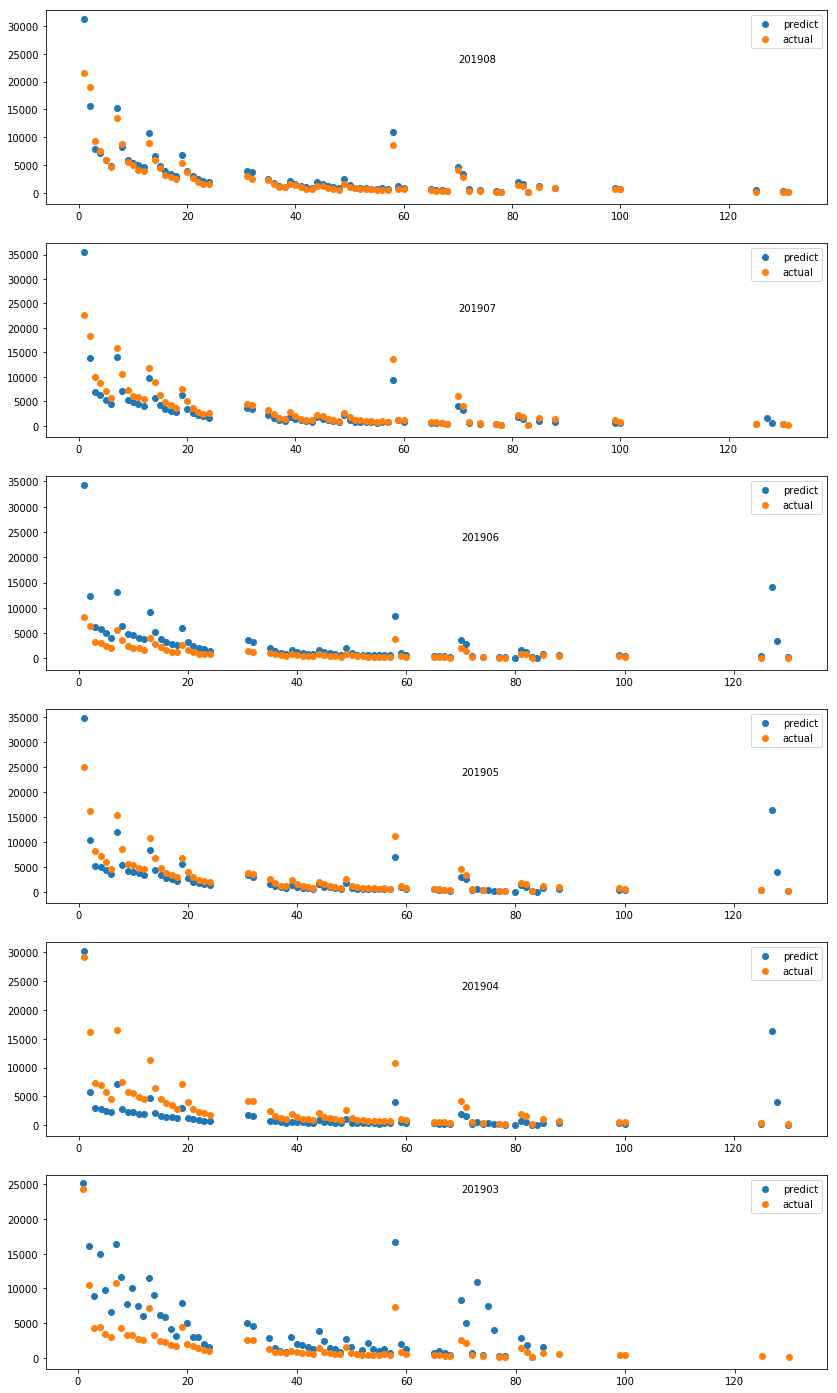

In [51]:
week = Week().get_previous_week()
plt.figure(1，figsize=(14, 25))
#begin 201903
for i in range(6):
    ax = plt.subplot(6, 1, i + 1)
    predict, actual  = plot_contrast_week(week)
    ax.scatter(predict.index, predict, label='predict')
    ax.scatter(actual.index, actual, label='actual')
    ax.text(70, 25000, week, verticalalignment="top")
    ax.legend()
    week = week.get_previous_week()
plt.show()

#### chapter_lesson

In [76]:
week = Week().get_previous_week()
week = week.get_previous_week()
print(week)
df = get_finish_lessons_weekly(week)

201907


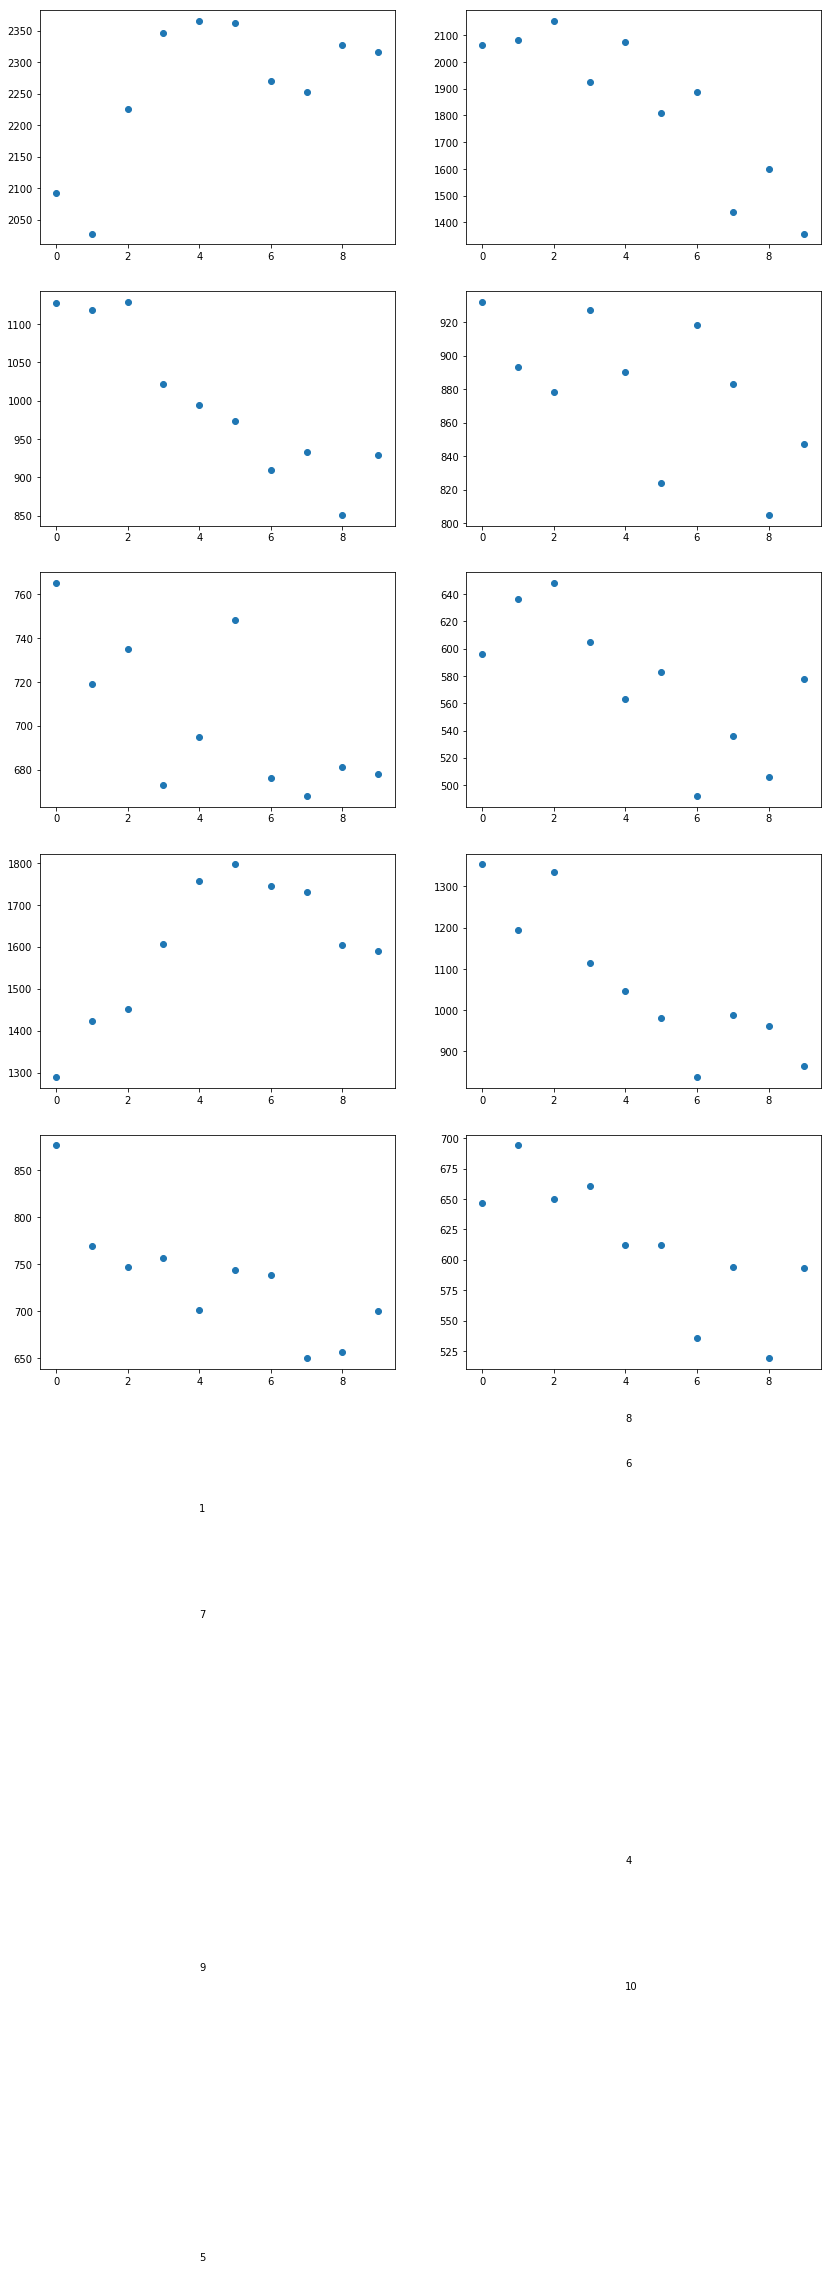

In [80]:
plt.figure(0,figsize=(14, 25))
i = 1
for c, data in df.loc[df['chapter'].isin([1,2,3,4,5,6,7,8,9,10])].groupby('chapter'):
    ax = plt.subplot(5, 2, i)
    ax.text(4, 0.8, c,)
    ax.scatter(range(data.index.size), data.student_count, )
    i += 1